In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
import gzip
import io
from IPython import display
import numpy as np
import pandas as pd
import tqdm

!pip install sacremoses
import sacremoses
display.clear_output()

# Prepare MT560 data

This is a big dataset, around 35GB compressed. Only a small part of it is relevant to the languages we are interested in, though. So first we find which lines have language codes  `lug` (Luganda), `ach` (Acholi), or `nyn` (Runyankore).

In [ ]:
## !wget https://object.pouta.csc.fi/OPUS-MT560/train.v1.lang.gz #uncomment if not downloaded

languages = pd.read_csv('/content/drive/MyDrive/NMT/train.v1.lang.gz', engine='c', names=['code'])
num_lines = len(languages)
# print(num_lines) ## 473791770

## 37 language codes that are also available in FLORES 200
# language_codes = ['lug', 'eng', 'ibo', 'ewe', 'hau', 'kam', 'kik', 'kin', 'kon', 'lin',
#              'lua', 'luo', 'nso', 'nya', 'run', 'sag', 'sna', 'som', 'sot', 'ssw', 
#              'swh', 'tir', 'tsn', 'tso', 'tum', 'twi', 'umb', 'wol', 'xho', 'yor',
#               'zul', 'aka', 'amh', 'bam', 'bem', 'dik', 'fuv'
#              ]

language_codes = ['lug', 'ibo']

line_languages = {}
for code in language_codes:
  lines = np.where(languages.code == code)[0]
  for l in lines:
    line_languages[l] = code

display.clear_output()

# output = []

# for code in language_codes:
#   N = sum(value == code for value in line_languages.values())
#   print(f'{N} lines of language {code}')
#   language_ouput = {
#       "language_code": code,
#       "number_of_lines": N
#   }
#   output.append(language_ouput)

In [ ]:
mtdata_df = pd.DataFrame(output)

In [ ]:
mtdata_df

,language_code,number_of_lines
0,lug,224749
1,ibo,415234
2,ewe,588735
3,hau,295829
4,kam,51054
5,kik,94242
6,kin,488086
7,kon,206234
8,lin,536198
9,lua,292212


In [ ]:
mtdata_df = mtdata_df[mtdata_df["number_of_lines"]>150000]
mtdata_df = mtdata_df.reset_index(drop=True)
print(mtdata_df["language_code"].nunique(), "\n")
print(mtdata_df["language_code"].unique())

25 

['lug' 'ibo' 'ewe' 'hau' 'kin' 'kon' 'lin' 'lua' 'nso' 'nya' 'run' 'sag'
 'sna' 'som' 'tir' 'tsn' 'tso' 'tum' 'twi' 'umb' 'xho' 'yor' 'zul' 'amh'
 'bem']


<AxesSubplot:xlabel='language_code', ylabel='number_of_lines'>

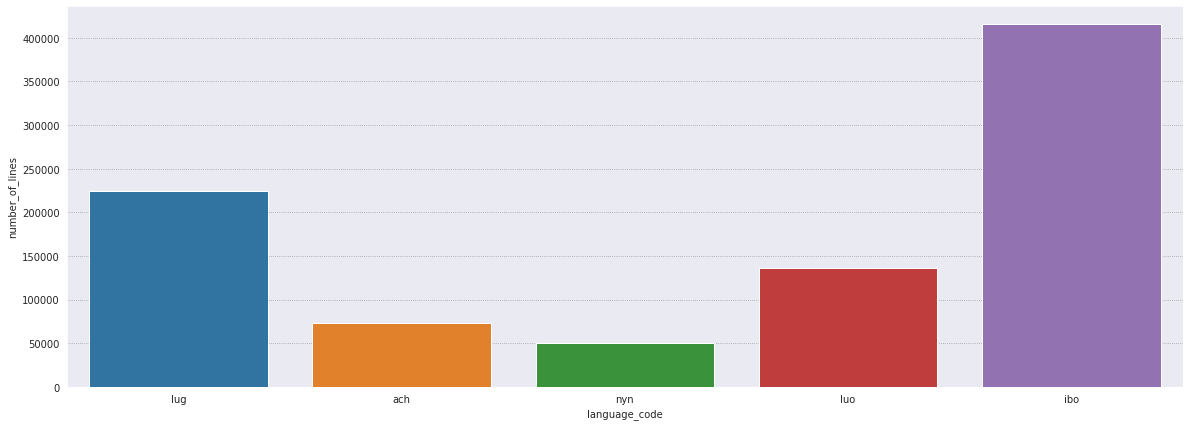

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.barplot(x="language_code", y="number_of_lines", data=mtdata_df)

In [ ]:
mtdata_df.to_csv("/content/drive/MyDrive/NMT/mtdata_africa/mtdata_africa_distribution(igbo).csv", index=False)

If that looks OK, then remove unnecessary files and variables to make space for iterating over the full dataset.

In [ ]:
# del languages
# !rm train.v1.lang*

Now retrieve the actual sentences. This should take ~30 minutes to download and ~50 minutes to iterate over.

In [ ]:
## uncomment if not downloaded
# !wget https://object.pouta.csc.fi/OPUS-MT560/train.v1.eng.tok.gz
# !wget https://object.pouta.csc.fi/OPUS-MT560/train.v1.src.tok.gz
# display.clear_output()

In [ ]:
source = []
language = []

with gzip.open('/content/drive/MyDrive/NMT/train.v1.src.tok.gz','r') as f:
  for i, line in tqdm.tqdm(enumerate(f), total=num_lines):
    if i in line_languages:
      source.append(line)
      language.append(line_languages[i])

100%|██████████| 473791770/473791770 [22:52<00:00, 345101.89it/s]


In [ ]:
english = [] 

with gzip.open('/content/drive/MyDrive/NMT/train.v1.eng.tok.gz','r') as f:
  for i, line in tqdm.tqdm(enumerate(f), total=num_lines):
    if i in line_languages:
      english.append(line)

100%|██████████| 473791770/473791770 [20:36<00:00, 383150.31it/s]


In [ ]:
# # open file in write mode
# with open('/content/drive/MyDrive/NMT/source(igbo).txt', 'w') as fp:
#     for item in source:
#         # write each item on a new line
#         fp.write("%s\n" % item)
#     print('Done')

Done


In [ ]:
# with open('/content/drive/MyDrive/NMT/language(igbo).txt', 'w') as fp:
#     for item in language:
#         # write each item on a new line
#         fp.write("%s\n" % item)
#     print('Done')

Done


In [ ]:
# with open('/content/drive/MyDrive/NMT/english(igbo).txt', 'w') as fp:
#     for item in english:
#         # write each item on a new line
#         fp.write("%s\n" % item)
#     print('Done')

Done


Detokenize the text, to remove extra spaces.

In [ ]:
# # empty list to read list from a file
# source = []

# # open file and read the content in a list
# with open('/content/drive/MyDrive/NMT/source(igbo).txt', 'r') as fp:
#     for line in fp:
#         # remove linebreak from a current name
#         # linebreak is the last character of each line
#         x = line[:-1]

#         # add current item to the list
#         source.append(x)

In [ ]:
# # empty list to read list from a file
# language = []

# # open file and read the content in a list
# with open('/content/drive/MyDrive/NMT/language(igbo).txt', 'r') as fp:
#     for line in fp:
#         # remove linebreak from a current name
#         # linebreak is the last character of each line
#         x = line[:-1]

#         # add current item to the list
#         language.append(x)

In [ ]:
# # empty list to read list from a file
# english = []

# # open file and read the content in a list
# with open('/content/drive/MyDrive/NMT/english(igbo).txt', 'r') as fp:
#     for line in fp:
#         # remove linebreak from a current name
#         # linebreak is the last character of each line
#         x = line[:-1]

#         # add current item to the list
#         english.append(x)

In [ ]:
# detokenizer = sacremoses.MosesDetokenizer(lang='en')
# source_detokenized = []
# english_detokenized = []
# for i in tqdm.tqdm(range(len(source)), position=0):
#   source_detokenized.append(
#       detokenizer.detokenize([source[i]]))
#   english_detokenized.append(
#       detokenizer.detokenize([english[i]]))

detokenizer = sacremoses.MosesDetokenizer(lang='en')
source_detokenized = []
english_detokenized = []
for i in tqdm.tqdm(range(len(source)), position=0):
  source_detokenized.append(
      detokenizer.detokenize([source[i].decode('utf8')]))
  english_detokenized.append(
      detokenizer.detokenize([english[i].decode('utf8')]))

100%|██████████| 900159/900159 [13:59<00:00, 1072.46it/s]


Create a CSV file with the results.

In [ ]:
mt560 = pd.DataFrame()
mt560['source'] = source_detokenized
mt560['english'] = english_detokenized
mt560['source_language'] = language
mt560.to_csv('/content/drive/MyDrive/NMT/mt560.csv.gz', index=False, compression='gzip')
mt560.sample(n=10)

,source,english,source_language
598126,Àjà Jehova ji Kraịst chụọ bụ ihe kacha egosi n...,The sacrifice of Christ is the greatest proof ...,ibo
476304,Yesu Kristo akooreka eki twine kukora arikugir...,Jesus Christ points to the simple step that we...,nyn
8604,Were Ndị Hụrụ Mmebi n'Anya Otú Jizọs Si Were Ha,Adopt Jesus' View of Those Who Love Lawlessness,ibo
98456,Ọdịda n'imepe X Windo sistem ngosi '% s',Failed to open X Window System display '% s',ibo
551812,N'olwekyo Baibuli egamba nti abantu ababiri ab...,Thus the Bible states that the first human pai...,lug
883407,Era yakitegeera okuva mu Byawandiikibwa nti om...,He also discerned from the Scriptures that a r...,lug
712808,"Kata kamano, ere kaka inyalo wach ni Yesu nind...",But how could it be said that Jesus sleeps and...,luo
48784,To be nitie gima Nyasaye osetimo e wi wachno?,But has God done anything to remedy the situat...,luo
416578,O doro anya na ọ bụ ịmata onye ahụ nke ọma.,"Well, how do you build your confidence in people?",ibo
421211,Obunnabbi obuli mu Zabbuli 40: 8 bwalaga nti Y...,Jesus' deep affection for the law of God was p...,lug


Save the results in a Drive folder

In [ ]:
drive.mount('/content/gdrive')

In [ ]:
!cp mt560.csv.gz "/content/gdrive/Shareddrives/Sunbird AI/Projects/NLP Technology/Data/"

# Prepare FLORES101 data

2,000 professionally translated sentences in the public dataset [[link]](https://github.com/facebookresearch/flores).

In [ ]:
!wget https://dl.fbaipublicfiles.com/flores101/dataset/flores101_dataset.tar.gz
!tar xvzf flores101_dataset.tar.gz
display.clear_output()

In [ ]:
flores = {}
for language in ['lug', 'luo', 'eng']:
  with open(f'flores101_dataset/dev/{language}.dev') as f:
    dev_lines = f.readlines()
  with open(f'flores101_dataset/devtest/{language}.devtest') as f:
    devtest_lines = f.readlines()
  lines = dev_lines + devtest_lines
  lines = [l.replace('\n', '') for l in lines]
  flores[language] = lines
  
flores = pd.DataFrame(flores)

In [ ]:
flores.sample(n=10)

In [ ]:
flores.to_csv('flores101.csv.gz', index=False, compression='gzip')
!cp flores101.csv.gz "/content/gdrive/Shareddrives/Sunbird AI/Projects/NLP Technology/Data/"

# Prepare Makerere/AI4D Luganda data

"An English-Luganda parallel corpus" [[link]](https://zenodo.org/record/4764039), containing 15,000 Luganda-English sentence pairs.

In [ ]:
!wget https://zenodo.org/record/4764039/files/Luganda.csv
display.clear_output()

There are some non-unicode characters in the file, so parse it indirectly.

In [ ]:
with open('Luganda.csv', encoding='utf-8', errors='replace') as f:
  lines = f.readlines()

ai4d_luganda = pd.read_csv(io.StringIO(''.join(lines)))

Make the format consistent with the MT560 data.

In [ ]:
ai4d_luganda = ai4d_luganda[['English', 'Luganda']]
ai4d_luganda = ai4d_luganda.dropna()
ai4d_luganda = ai4d_luganda.rename(
    columns={'Luganda': 'lug', 'English': 'eng'})
ai4d_luganda.sample(n=10)

Upload to Drive folder.

In [ ]:
ai4d_luganda.to_csv('ai4d_luganda.csv.gz', index=False, compression='gzip')
!cp ai4d_luganda.csv.gz "/content/gdrive/Shareddrives/Sunbird AI/Projects/NLP Technology/Data/"

# Multilingual Igbo Data

In [3]:
%cd /content/drive/MyDrive/NMT/IGBO

/content/drive/MyDrive/NMT/IGBO


### Common Crawl from the CC-Net Repository ([Data](https://autonlp.ai/datasets/cc100-igbo))

In [ ]:
!wget http://data.statmt.org/cc-100/ig.txt.xz

--2023-03-16 23:09:13--  http://data.statmt.org/cc-100/ig.txt.xz
Resolving data.statmt.org (data.statmt.org)... 129.215.197.184
Connecting to data.statmt.org (data.statmt.org)|129.215.197.184|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.statmt.org/cc-100/ig.txt.xz [following]
--2023-03-16 23:09:13--  https://data.statmt.org/cc-100/ig.txt.xz
Connecting to data.statmt.org (data.statmt.org)|129.215.197.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6912328 (6.6M) [application/x-xz]
Saving to: ‘ig.txt.xz’

ig.txt.xz           100%[===================>]   6.59M  5.54MB/s    in 1.2s    

2023-03-16 23:09:15 (5.54 MB/s) - ‘ig.txt.xz’ saved [6912328/6912328]



In [ ]:
import lzma

# open file2 in writing mode
file2 = open('common_crawl_igbo.txt','w')

# read from .xz and write to file2 to save as .txt
with lzma.open('ig.txt.xz', mode='rt', encoding='utf-8') as fid:
    for line in fid:
      file2.write(line)

file2.close()

In [ ]:
file2 = open('common_crawl_igbo.txt','r')

# print the file2 content
print(file2.readline())


Nkea wu akuko nke anyi na a kpo News Analysis, si na Voice of Biafra International (VOBI) Radio, di na Washington DC, na ala America, na a bia ra unu na abali a.



# IgboNLP Multilingual Data ([Data](https://github.com/IgnatiusEzeani/IGBONLP/tree/master/ig_monoling))

In [ ]:
!unzip /content/drive/MyDrive/NMT/IGBO/text.zip

Archive:  /content/drive/MyDrive/NMT/IGBO/text.zip
  inflating: bbc-igbo.txt            
  inflating: eze_goes_to_school.txt  
  inflating: igbo-radio.txt          
  inflating: jw-books.txt            
  inflating: jw-nt-igbo.txt          
  inflating: jw-ot-igbo.txt          
  inflating: jw-teta.txt             
  inflating: jw-ulo_nche.txt         
  inflating: jw-ulo_nche_naamu.txt   
  inflating: mmadu_ka_a_na_aria.txt  


#### Merge the monolingual Igbo data
Since some of the Common Crawl Data contains JW texts, we leave out the JW texts in the IgboNLP data to minimise the weight of religious domain.  

Data to be merged are:
- /content/drive/MyDrive/NMT/IGBO/common_crawl_igbo.txt
- /content/drive/MyDrive/NMT/IGBO/igbo-radio.txt
- /content/drive/MyDrive/NMT/IGBO/eze_goes_to_school.txt
- /content/drive/MyDrive/NMT/IGBO/mmadu_ka_a_na_aria.txt

In [ ]:
# list of data file names  Ka ọ dị
filenames = ['common_crawl_igbo.txt', 'igbo-radio.txt', 'eze_goes_to_school.txt',\
             'mmadu_ka_a_na_aria.txt']
 
# Open merged file for in write mode
with open('merged_multilingual_igbo.txt', 'w', encoding='utf-8') as outfile:
 
    # Iterate through list
    for names in filenames:
 
        # Open each file in read mode
        with open(names) as infile:
 
            # read the data from data files and write to merged file
            outfile.write(infile.read())

        outfile.write("\n")

### Data Cleaning

In [ ]:
import re
text = "Copyright © 2018 BBC."
print(re.sub(u'(\N{COPYRIGHT SIGN}|\N{TRADE MARK SIGN}|\N{REGISTERED SIGN})', "", text))

Copyright  2018 BBC.


In [ ]:
## make all lines unique to avoid duplicates
## remove email address
## remove urls and html tags -> E.g: <a href="http://mywebsite.
## remove asterisks
## remove Copyright icon
## TODO:
## remove hashtags and emojis
## ## separate numbers from strings for cases like "ha26 Septemba", which should be "ha 26 Septemba". 

OutFile = open('merged_multilingual_igbo(clean).txt',"w")

InFile = open('merged_multilingual_igbo.txt', "r")

lines_present = set()
# iterate every line present in the file
for l in InFile:
   # check whether the lines are unique
   if l not in lines_present:
      l = re.sub(r'https?://\S+', '', l) # remove url
      l = re.sub(r'\S*@\S*\s?', '', l) # remove email
      l = re.sub(r'\*', '', l) # remove email
      l = re.sub(u'(\N{COPYRIGHT SIGN}|\N{TRADE MARK SIGN}|\N{REGISTERED SIGN})', "", l) # remove these icons
      # writing all the unique lines in the output file
      OutFile.write(l)
      # adding unique lines in the lines_present
      lines_present.add(l)
# closing the output text files
OutFile.close()
InFile.close()

### AfriBerta Corpus

In [7]:
!curl -X GET \
     "https://datasets-server.huggingface.co/first-rows?dataset=castorini%2Fafriberta-corpus&config=igbo&split=train"

{"dataset":"castorini/afriberta-corpus","config":"igbo","split":"train","features":[{"feature_idx":0,"name":"id","type":{"dtype":"string","_type":"Value"}},{"feature_idx":1,"name":"text","type":{"dtype":"string","_type":"Value"}}],"rows":[{"row_idx":0,"row":{"id":"0","text":"ọ natọkwa ọchị ka otu ndị ahụ si ekwu na Kịng Jems\n"},"truncated_cells":[]},{"row_idx":1,"row":{"id":"1","text":"(b) Olee ihe ùgwù kachanụ mmadụ ọ bụla nwere?\n"},"truncated_cells":[]},{"row_idx":2,"row":{"id":"2","text":"Onyeisiala Naijiria bụ Muhammadu Buhari hafere Mahamadou ọchịchị n'ọgbakọ Ecowas nke iri ise na ise nke e mere na Abuja ụbọchị Satọdee.\n"},"truncated_cells":[]},{"row_idx":3,"row":{"id":"3","text":"Jehova ga- achọtara onwe ya nwoke obi ya nabatara ; Jehova ga- ahọpụtakwa ya ịbụ onye ndú nke ndị ya , n’ ihi na i debeghị ihe Jehova nyere gị n’ iwu .\n"},"truncated_cells":[]},{"row_idx":4,"row":{"id":"4","text":"Na nkọwa ha, ụfọdụ ndị mmadụ na-egboji ọrịa kansa,mgbe ha ga-eji gazie ụlọọgwụ ọ bụrụ n

In [8]:
!wget https://huggingface.co/datasets/castorini/afriberta-corpus/resolve/main/igbo/train.zip

--2023-03-17 13:55:19--  https://huggingface.co/datasets/castorini/afriberta-corpus/resolve/main/igbo/train.zip
Resolving huggingface.co (huggingface.co)... 34.203.133.210, 54.156.223.8, 52.72.82.160, ...
Connecting to huggingface.co (huggingface.co)|34.203.133.210|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/datasets/castorini/afriberta-corpus/0b42e54d602fdc47bbe736151222cf4e648340abebc49e0ab8143ef181a591de?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27train.zip%3B+filename%3D%22train.zip%22%3B&response-content-type=application%2Fzip&Expires=1679320520&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL2RhdGFzZXRzL2Nhc3RvcmluaS9hZnJpYmVydGEtY29ycHVzLzBiNDJlNTRkNjAyZmRjNDdiYmU3MzYxNTEyMjJjZjRlNjQ4MzQwYWJlYmM0OWUwYWI4MTQzZWYxODFhNTkxZGU%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qJnJlc3BvbnNlLWNvbnRlbnQtdHlwZT0qIiwiQ29uZGl0aW9uIjp7IkRhdGVMZXNzVGhhbiI6eyJBV1M6RXBvY2hUaW1lIj

In [9]:
!unzip train.zip

Archive:  train.zip
  inflating: train.txt               


In [10]:
!wget https://huggingface.co/datasets/castorini/afriberta-corpus/resolve/main/igbo/eval.zip
!unzip eval.zip

--2023-03-17 13:56:19--  https://huggingface.co/datasets/castorini/afriberta-corpus/resolve/main/igbo/eval.zip
Resolving huggingface.co (huggingface.co)... 52.204.1.121, 3.222.58.47, 23.20.50.97, ...
Connecting to huggingface.co (huggingface.co)|52.204.1.121|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/datasets/castorini/afriberta-corpus/4a43a72c19f136f3893ad7cde1f8588ae559358028295dec1f0267d561d503ba?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27eval.zip%3B+filename%3D%22eval.zip%22%3B&response-content-type=application%2Fzip&Expires=1679320579&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL2RhdGFzZXRzL2Nhc3RvcmluaS9hZnJpYmVydGEtY29ycHVzLzRhNDNhNzJjMTlmMTM2ZjM4OTNhZDdjZGUxZjg1ODhhZTU1OTM1ODAyODI5NWRlYzFmMDI2N2Q1NjFkNTAzYmE%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qJnJlc3BvbnNlLWNvbnRlbnQtdHlwZT0qIiwiQ29uZGl0aW9uIjp7IkRhdGVMZXNzVGhhbiI6eyJBV1M6RXBvY2hUaW1lIjoxNjc5MzI